[{(4, 1): 0.3237, (4, 2): 0.3308, (4, 3): 0.3238, (5, 1): 0.3218, (5, 2): 0.3208, (5, 3): 0.3124, (6, 1): 0.3207, (6, 2): 0.3218, (6, 3): 0.3163, (7, 1): 0.3231, (7, 2): 0.3188, (7, 3): 0.3224, (8, 1): 0.3186, (8, 2): 0.3234, (8, 3): 0.3271, (9, 1): 0.3166, (9, 2): 0.3208, (9, 3): 0.3215, (10, 1): 0.3194, (10, 2): 0.3218, (10, 3): 0.3171, (11, 1): 0.3165, (11, 2): 0.3161, (11, 3): 0.3235, (12, 1): 0.3148, (12, 2): 0.317, (12, 3): 0.3174}, {(4, 1): 0.322, (4, 2): 0.3229, (4, 3): 0.3144, (5, 1): 0.3231, (5, 2): 0.3304, (5, 3): 0.3245, (6, 1): 0.3296, (6, 2): 0.3231, (6, 3): 0.3265, (7, 1): 0.3235, (7, 2): 0.3296, (7, 3): 0.3228, (8, 1): 0.3225, (8, 2): 0.3298, (8, 3): 0.3287, (9, 1): 0.3234, (9, 2): 0.3341, (9, 3): 0.3338, (10, 1): 0.3256, (10, 2): 0.3263, (10, 3): 0.3238, (11, 1): 0.3168, (11, 2): 0.3304, (11, 3): 0.3334, (12, 1): 0.3179, (12, 2): 0.3171, (12, 3): 0.3288}, {(4, 1): 0.321, (4, 2): 0.3157, (4, 3): 0.3156, (5, 1): 0.309, (5, 2): 0.3224, (5, 3): 0.315, (6, 1): 0.3208, (6, 2

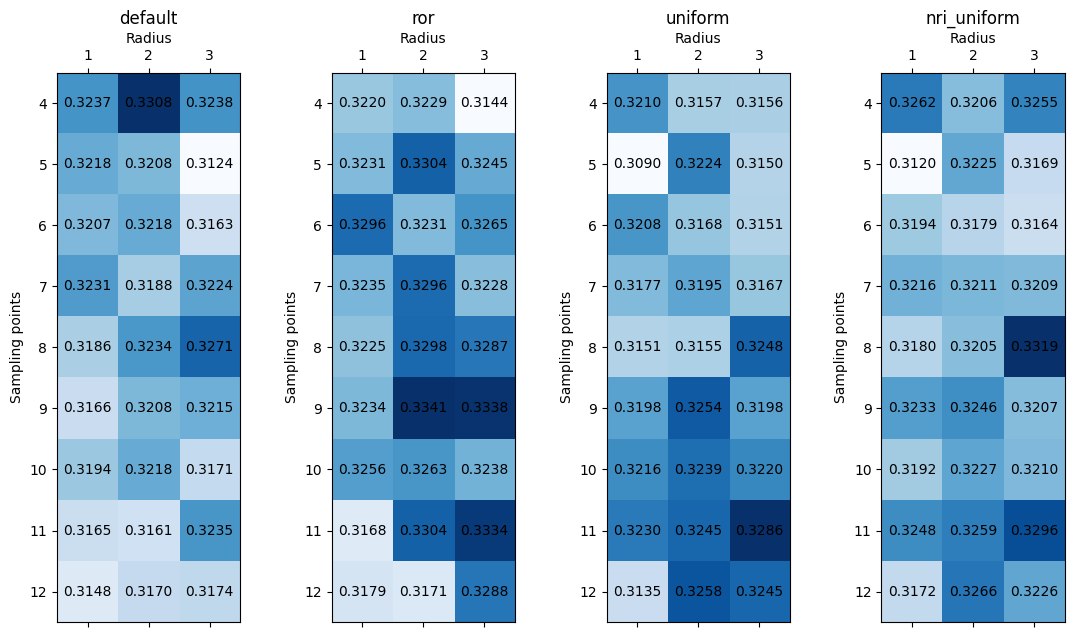

In [60]:
from matplotlib import pyplot as plt
import numpy as np

types = ["default", "ror", "uniform", "nri_uniform"]
with open("raw_lbp.txt") as f:
    
    data = list(map(lambda x: [ types.index(x[2]) ] + x[:2] + [x[3]], [ line.split()[1::2] for line in f]))
    processed = [{} for _ in range(4)]
    for d in data:
        processed[d[0]][(int(d[1]), int(d[2]))] = float(d[3])
    print(processed)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 4, figsize=(13, 13))

    for i in range(4):
        matrix = np.array([[processed[i].get((j, k), 0) for k in range(1, 4)] for j in range(4, 13)])

        # Display the first matrix on the first subplot
        cax1 = axs[i].matshow(matrix, cmap=plt.cm.Blues)
        axs[i].set_title(types[i])
        axs[i].set_xticks(np.arange(matrix.shape[1]))
        axs[i].set_yticks(np.arange(matrix.shape[0]))
        axs[i].set_xticklabels(np.arange(1, matrix.shape[1] + 1))
        axs[i].set_yticklabels(np.arange(4, matrix.shape[0] + 4))
        
        axs[i].set_xlabel("Radius")
        axs[i].xaxis.set_label_position('top')  # Move x-axis label to top

        axs[i].set_ylabel("Sampling points")

        # Add text to each cell of the first matrix
        for j in range(matrix.shape[0]):
            for k in range(matrix.shape[1]):
                axs[i].text(k, j, f'{matrix[j, k]:.4f}', ha='center', va='center', color='black', fontsize=10)

        # Add padding between subplots
        plt.subplots_adjust(wspace=0.5)


    plt.show()
